In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
txt_files = glob.glob('../data/*.txt')

In [27]:
pcr_files_pointone = []
pcr_files_one      = []
pcr_files_ten      = []

rat_files_pointone = []
rat_files_one      = []
rat_files_ten      = []

for i in range(0,len(txt_files)):
    if(txt_files[i][8:11]=="PCR"):
        if(txt_files[i][12:15]=="0.1"):
            pcr_files_pointone.append(txt_files[i])
        elif(txt_files[i][12:15]=="1.0"):
            pcr_files_one.append(txt_files[i])
        elif(txt_files[i][12:15]=="10."):
            pcr_files_ten.append(txt_files[i])
    elif(txt_files[i][8:11]=="RAT"):
        if(txt_files[i][12:15]=="0.1"):
            rat_files_pointone.append(txt_files[i])
        elif(txt_files[i][12:15]=="1.0"):
            rat_files_one.append(txt_files[i])
        elif(txt_files[i][12:15]=="10."):
            rat_files_ten.append(txt_files[i])
            
pcr_files_pointone = sorted(pcr_files_pointone)
pcr_files_one      = sorted(pcr_files_one)
pcr_files_ten      = sorted(pcr_files_ten)

rat_files_pointone = sorted(rat_files_pointone)
rat_files_one      = sorted(rat_files_one)
rat_files_ten      = sorted(rat_files_ten)

# print(pcr_files_pointone)
# print(pcr_files_one)
# print(pcr_files_ten)

all_pcr_files = [pcr_files_pointone,pcr_files_one,pcr_files_ten]
all_rat_files = [rat_files_pointone,rat_files_one,rat_files_ten]

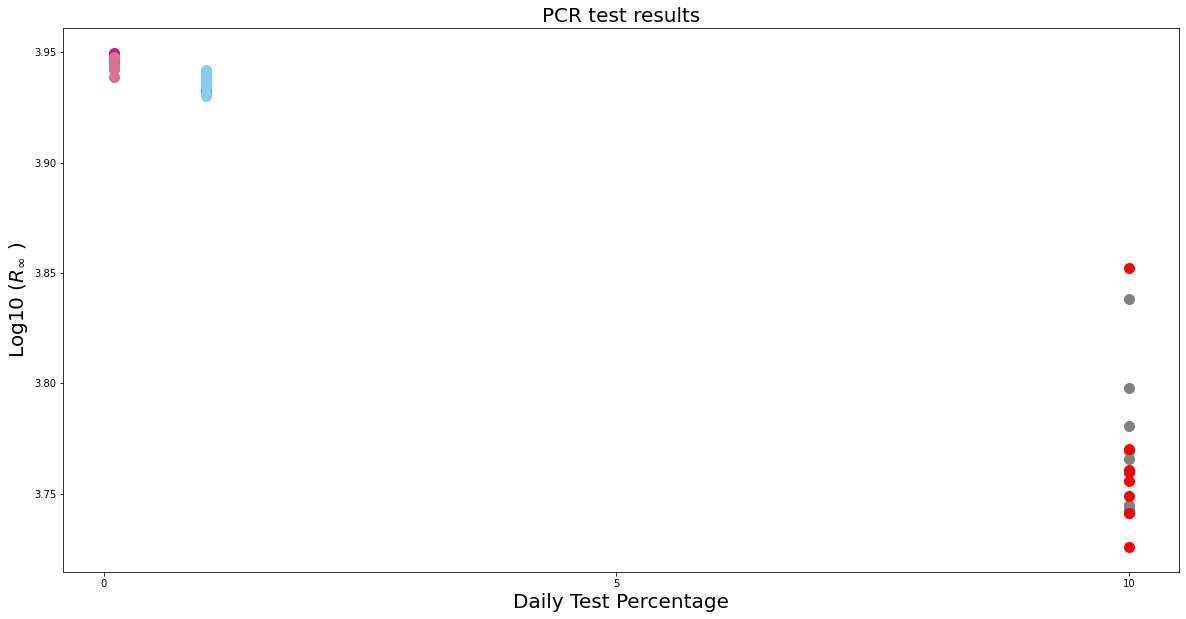

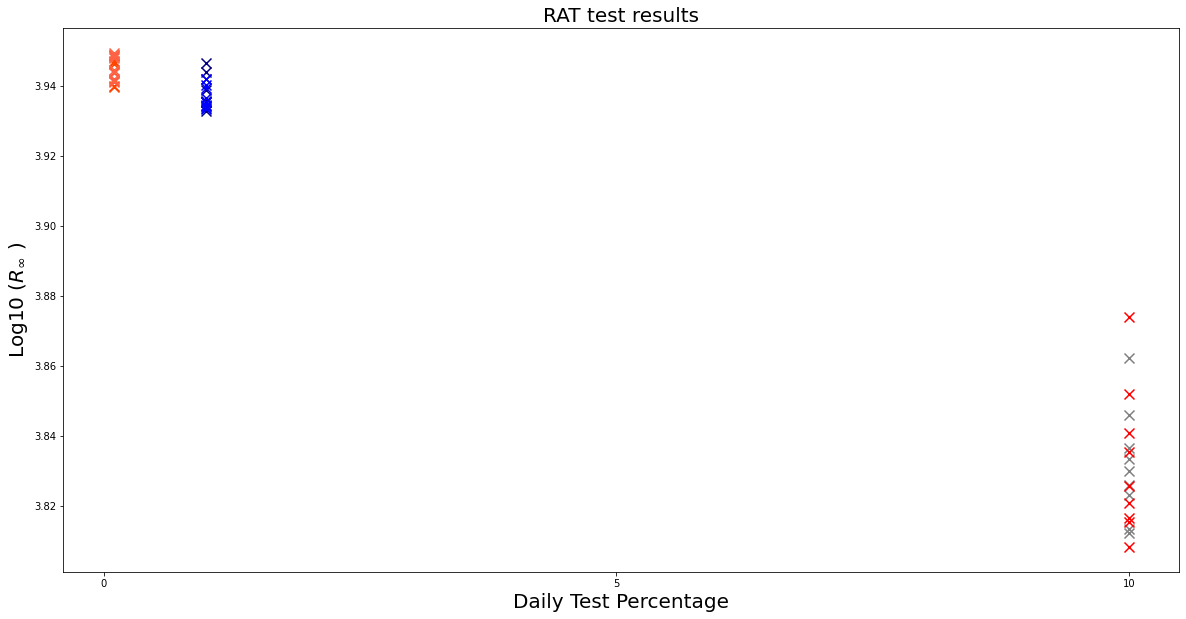

In [29]:
pcr_pointone = []
pcr_one      = []
pcr_ten      = []

rat_pointone = []
rat_one      = []
rat_ten      = []


all_pcr_data = [pcr_pointone,pcr_one,pcr_ten]
all_rat_data = [rat_pointone,rat_one,rat_ten]

all_pcr_type = [[],[],[]]
all_rat_type = [[],[],[]]


for i in range(0,len(all_pcr_files)):
    for j in range(0,len(all_pcr_files[i])):
        temp = pd.read_csv(all_pcr_files[i][j],delimiter=" ", header=None)[4][1001]
        all_pcr_data[i].append(temp)
        
        temp_type = all_pcr_files[i][j][16:22]
        all_pcr_type[i].append(temp_type)
        
for i in range(0,len(all_rat_files)):
    for j in range(0,len(all_rat_files[i])):
        temp = pd.read_csv(all_rat_files[i][j],delimiter=" ", header=None)[4][1001]
        all_rat_data[i].append(temp)
        
        temp_type = all_rat_files[i][j][16:22]
        all_rat_type[i].append(temp_type)


        

x_axis_pcr = [[0.1]*len(pcr_pointone),[1.0]*len(pcr_one),[10.0]*len(pcr_ten)]
x_axis_rat = [[0.1]*len(rat_pointone),[1.0]*len(rat_one),[10.0]*len(rat_ten)]

labels = ["0.1","1.0","10.0"]

pcr_colorscheme = np.array([["mediumvioletred","palevioletred"],     # 0.1 (Random testing, Symptomatic testing)
                   ["dodgerblue","skyblue"],                # 1.0 (Random testing, Symptomatic testing)
                   ["grey","red"]])                        # 10.0(Random testing, Symptomatic testing)



rat_colorscheme = np.array([["orangered","tomato"],     # 0.1 (Random testing, Symptomatic testing)
                   ["navy","blue"],                # 1.0 (Random testing, Symptomatic testing)
                   ["grey","red"]])                        # 10.0(Random testing, Symptomatic testing)





plt.figure(figsize=(20,10))
plt.title("PCR test results",fontsize='20')

for i in range(0, len(all_pcr_data)):
    for j in range(0, len(all_pcr_data[i])):
        if(all_pcr_type[i][j] == "Random"):
            col = pcr_colorscheme[:,0][i]
            m = 'o'
        elif(all_pcr_type[i][j] == "Sympto"):
            col = pcr_colorscheme[:,1][i]
            m = 'o'
        plt.scatter(x_axis_pcr[i][j],np.log10(all_pcr_data[i][j]),color=col,s=100,marker=m)#,label="PCR "+all_pcr_type[i][j]+" "+labels[i]

# plt.legend(fontsize='15')
plt.xlabel("Daily Test Percentage",fontsize=20)
plt.ylabel(r"Log10 ($R_\infty$ )",fontsize=20)
plt.locator_params(nbins = len(labels),axis='x')
plt.savefig("../images/PCR_comparison_1.png",facecolor='w')
plt.show()

plt.figure(figsize=(20,10))
plt.title("RAT test results",fontsize='20')


for i in range(0, len(all_rat_data)):
    for j in range(0, len(all_rat_data[i])):
        if(all_rat_type[i][j] == "Random"):
            col = rat_colorscheme[:,0][i]
            m='x'
        elif(all_rat_type[i][j] == "Sympto"):    
            col = rat_colorscheme[:,1][i]
            m='x'
        plt.scatter(x_axis_rat[i][j],np.log10(all_rat_data[i][j]),color=col,s=100,marker=m)#,label="RAT "+all_pcr_type[i][j]+" "+labels[i])
        
#plt.legend(fontsize='15')
plt.xlabel("Daily Test Percentage",fontsize=20)
plt.ylabel(r"Log10 ($R_\infty$ )",fontsize=20)
plt.locator_params(nbins = len(labels),axis='x')
plt.savefig("../images/RAT_comparison_1.png",facecolor='w')
plt.show()

In [5]:
pcr_random = [[],[],[]]
pcr_symp = [[],[],[]]

for i in range(0, len(all_pcr_data)):
    
    for j in range(0, len(all_pcr_data[i])):
        
        if(all_pcr_type[i][j] == "Random"):
            pcr_random[i].append(all_pcr_data[i][j])
            
        elif(all_pcr_type[i][j] == "Sympto"):
            pcr_symp[i].append(all_pcr_data[i][j])


rat_random = [[],[],[]]
rat_symp = [[],[],[]]
            
for i in range(0, len(all_rat_data)):
    
    for j in range(0, len(all_rat_data[i])):
        
        if(all_rat_type[i][j] == "Random"):
            rat_random[i].append(all_rat_data[i][j])
            
        elif(all_rat_type[i][j] == "Sympto"):
            rat_symp[i].append(all_rat_data[i][j])

pcr_random_avg = np.average(np.array(pcr_random),axis=1)
pcr_symp_avg = np.average(np.array(pcr_symp),axis=1)

rat_random_avg = np.average(np.array(rat_random),axis=1)
rat_symp_avg = np.average(np.array(rat_symp),axis=1)


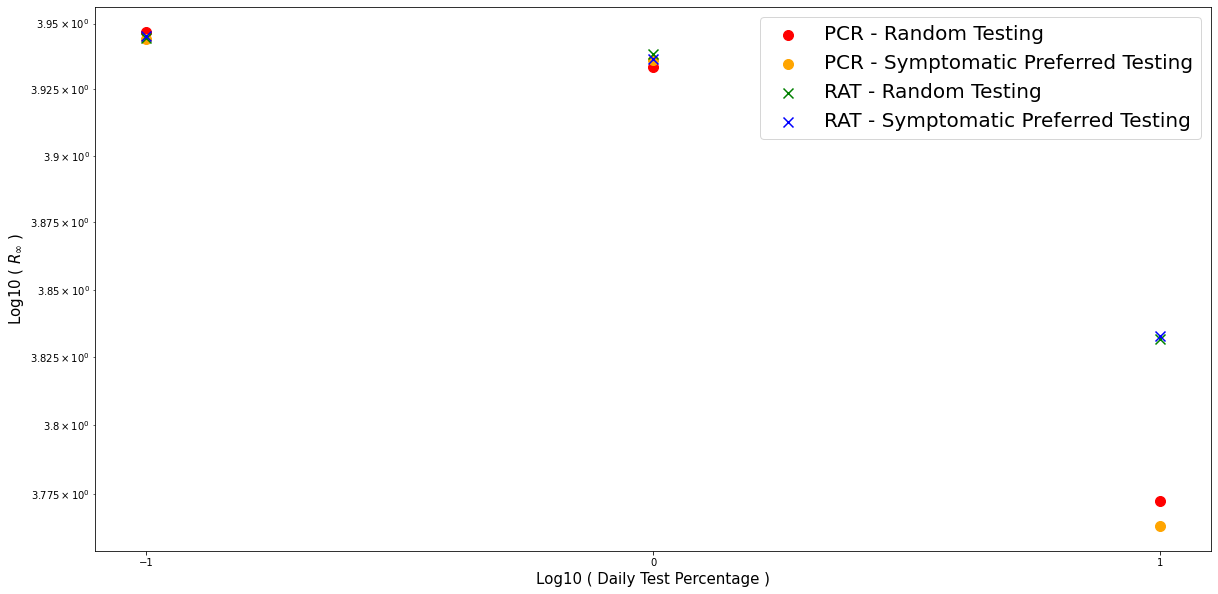

In [26]:
x = [0.1,1.0,10.0]
plt.figure(figsize=(20,10))
plt.scatter(np.log10(x),np.log10(pcr_random_avg), marker = 'o', color='red',label="PCR - Random Testing",s=100)
plt.scatter(np.log10(x),np.log10(pcr_symp_avg), marker = 'o', color='orange', label="PCR - Symptomatic Preferred Testing",s=100)
plt.scatter(np.log10(x),np.log10(rat_random_avg), marker = 'x', color = 'green', label="RAT - Random Testing",s=100)
plt.scatter(np.log10(x),np.log10(rat_symp_avg), marker = 'x',color='blue', label="RAT - Symptomatic Preferred Testing",s=100)
plt.legend(fontsize=20)
plt.yscale('log')

plt.xlabel("Log10 ( Daily Test Percentage )",fontsize=15)
plt.ylabel(r"Log10 ( $R_\infty$ )",fontsize=15)
plt.locator_params(nbins = len(labels),axis='x')

plt.savefig("../images/PCR_RAT_comparison_1.png",facecolor='w')
plt.show()

In [7]:
ook = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(np.average(ook,axis=1))

[2. 5. 8.]
